## 1. Data

In [1]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
%matplotlib inline

In [2]:
smarket = pd.read_csv('Smarket.csv')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
smarket.shape

(1250, 9)

In [5]:
smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


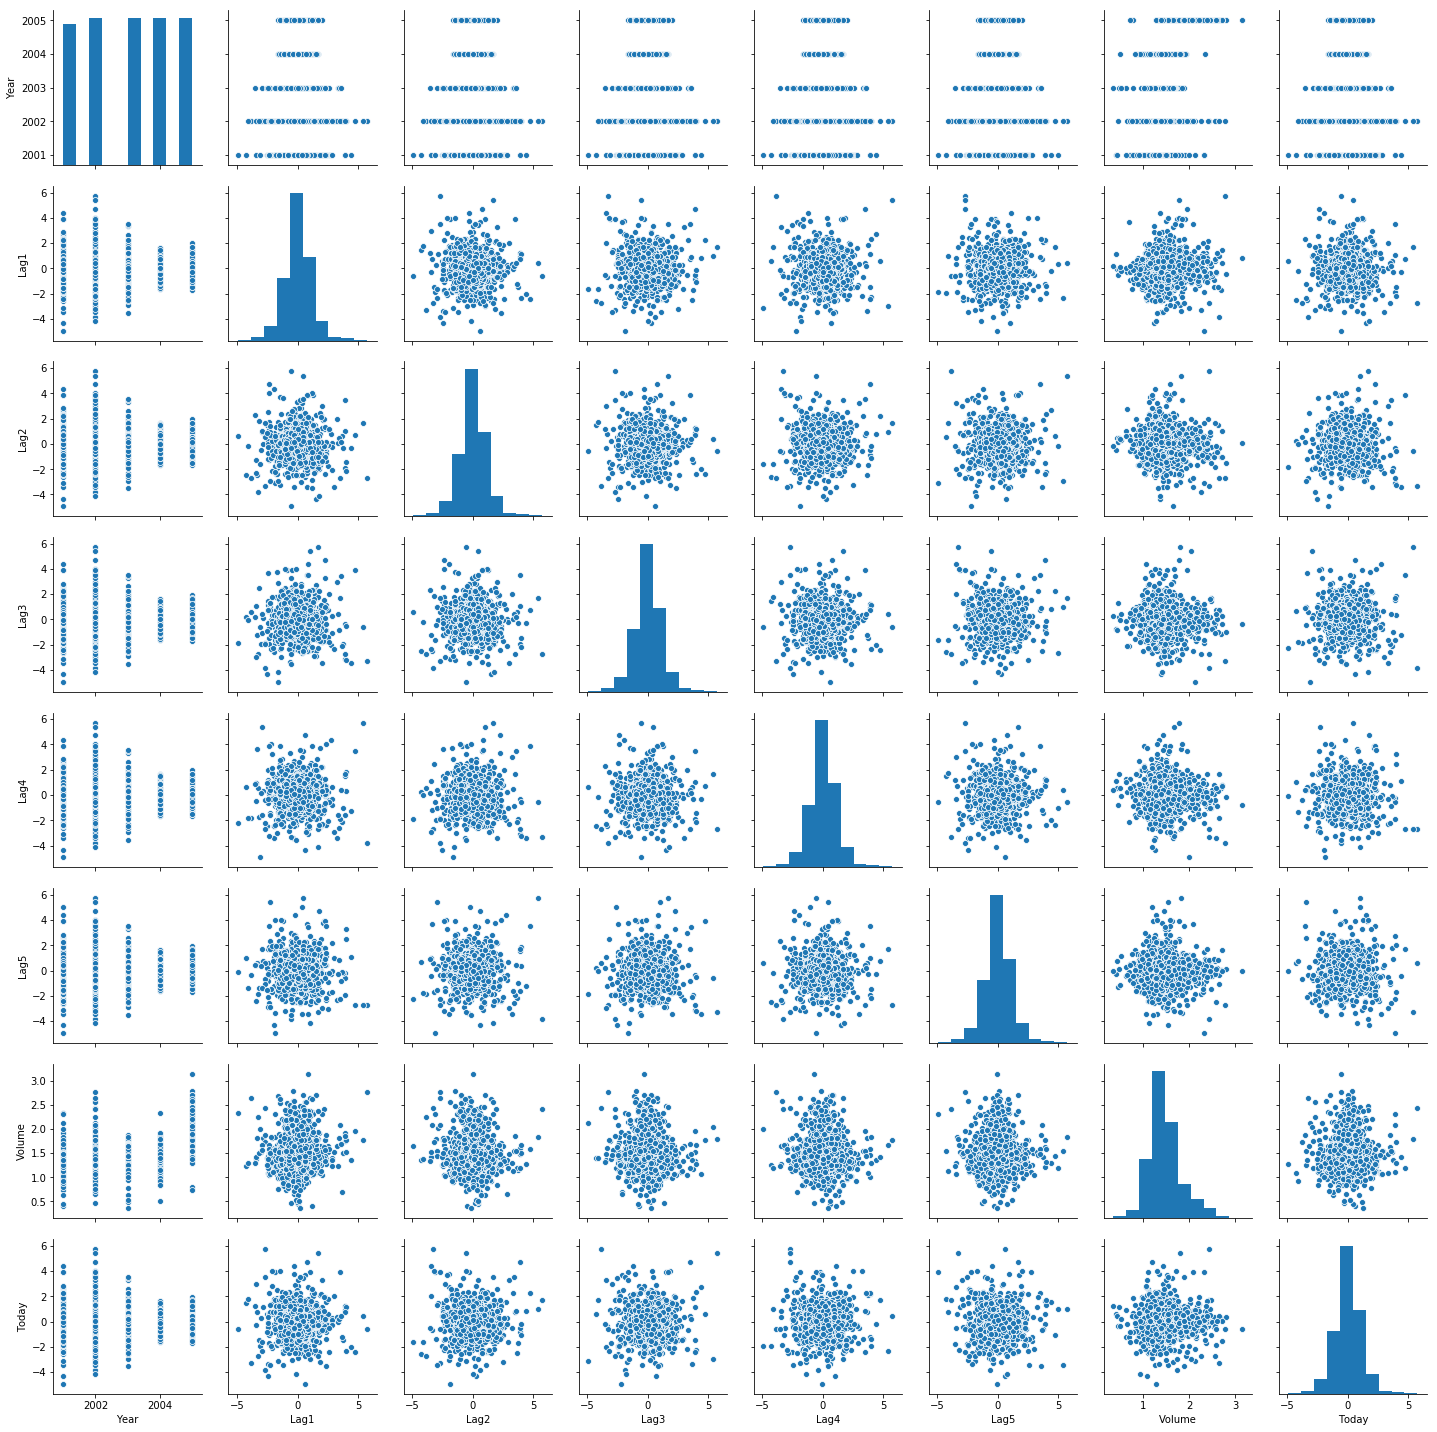

In [6]:
sns.pairplot(smarket)

In [7]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


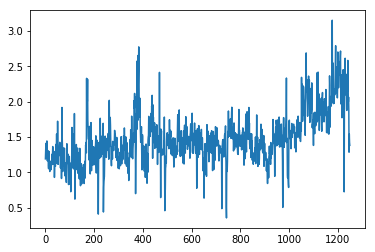

In [8]:
plt.plot(smarket.Volume)

## 2. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
X_sk = smarket.loc[:,'Lag1':'Volume']
y_sk = smarket.Direction

In [11]:
glm_model = LogisticRegression(fit_intercept=True, C=1e9)
glm_fit = glm_model.fit(X_sk, y_sk)

In [12]:
glm_fit.intercept_

array([-0.12600781])

In [13]:
glm_fit.coef_

array([[-0.07307339, -0.04230074,  0.01108552,  0.00935968,  0.01031339,
         0.13544567]])

In [14]:
# prediction summary
pd.DataFrame({'prob_0': glm_fit.predict_proba(X_sk)[:, 0], 
              'prob_1': glm_fit.predict_proba(X_sk)[:, 1], 
              'pred_class': glm_fit.predict(X_sk)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.492916,0.507084,Up
1,0.518533,0.481467,Down
2,0.518861,0.481139,Down
3,0.484778,0.515222,Up
4,0.489219,0.510781,Up
5,0.493043,0.506957,Up
6,0.507349,0.492651,Down
7,0.490771,0.509229,Up
8,0.482387,0.517613,Up
9,0.511162,0.488838,Down


In [15]:
conf_m = pd.DataFrame(confusion_matrix(y_sk, glm_fit.predict(X_sk)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,145,457
1,141,507


In [16]:
print('Accuracy: ' + str(accuracy_score(y_sk, glm_fit.predict(X_sk))))
print('Training Error: ' + str(1 - accuracy_score(y_sk, glm_fit.predict(X_sk))))

Accuracy: 0.5216
Training Error: 0.47840000000000005


In [17]:
# train test split
train = smarket.loc[smarket.Year < 2005]
smarket_2005 = smarket.loc[smarket.Year >= 2005]

In [18]:
X_sk_train = train.loc[:,'Lag1':'Volume']
y_sk_train = train.Direction

X_sk_test = smarket_2005.loc[:,'Lag1':'Volume']
y_sk_test = smarket_2005.Direction

glm_model_t = LogisticRegression(fit_intercept=True, C=1e9)
glm_fit_t = glm_model.fit(X_sk_train, y_sk_train)

In [19]:
# prediction summary
pd.DataFrame({'prob_0': glm_fit_t.predict_proba(X_sk_test)[:, 0], 
              'prob_1': glm_fit_t.predict_proba(X_sk_test)[:, 1], 
              'pred_class': glm_fit_t.predict(X_sk_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.471780,0.528220,Up
1,0.484332,0.515668,Up
2,0.477348,0.522652,Up
3,0.486146,0.513854,Up
4,0.501665,0.498335,Down
5,0.498908,0.501092,Up
6,0.497229,0.502771,Up
7,0.490432,0.509568,Up
8,0.495989,0.504011,Up
9,0.489360,0.510640,Up


In [20]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test, glm_fit.predict(X_sk_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,77,34
1,97,44


In [21]:
print('Accuracy: ' + str(accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))

Accuracy: 0.4801587301587302
Test Error: 0.5198412698412698


In [47]:
X_sk_train_s = train.loc[:,'Lag1':'Lag2']
y_sk_train_s = train.Direction

X_sk_test_s = smarket_2005.loc[:,'Lag1':'Lag2']
y_sk_test_s = smarket_2005.Direction

In [22]:
glm_model_t_s = LogisticRegression(fit_intercept=True, C=1e9)
glm_fit_t_s = glm_model.fit(X_sk_train_s, y_sk_train_s)

In [23]:
pd.DataFrame({'prob_0': glm_fit_t_s.predict_proba(X_sk_test_s)[:, 0], 
              'prob_1': glm_fit_t_s.predict_proba(X_sk_test_s)[:, 1], 
              'pred_class': glm_fit_t_s.predict(X_sk_test_s)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.490173,0.509827,Up
1,0.479180,0.520820,Up
2,0.466737,0.533263,Up
3,0.473935,0.526065,Up
4,0.492784,0.507216,Up
5,0.493864,0.506136,Up
6,0.495107,0.504893,Up
7,0.487276,0.512724,Up
8,0.490689,0.509311,Up
9,0.484385,0.515615,Up


In [24]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test_s, glm_fit.predict(X_sk_test_s)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,35,76
1,35,106


In [25]:
print('Accuracy: ' + str(accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))

Accuracy: 0.5595238095238095
Test Error: 0.44047619047619047


In [26]:
predict_data = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})

In [27]:
glm_fit.predict_proba(predict_data)[:, 1]

array([0.47914604, 0.49611109])

## 3. LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

In [30]:
lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

In [41]:
print("Prior probabilities of groups:", lda_fit.priors_)

Prior probabilities of groups: [0.49198397 0.50801603]


In [39]:
print("Group means:", lda_fit.means_) 

Group means: [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [40]:
print("Coefficients of linear discriminants:", lda_fit.scalings_)

Coefficients of linear discriminants: [[-0.64201904]
 [-0.51352928]]


In [42]:
pd.DataFrame({'prob_0': lda_fit.predict_proba(X_test)[:, 0], 
              'prob_1': lda_fit.predict_proba(X_test)[:, 1], 
              'pred_class': lda_fit.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.490179,0.509821,Up
1,0.479218,0.520782,Up
2,0.466818,0.533182,Up
3,0.474001,0.525999,Up
4,0.492788,0.507212,Up
5,0.493856,0.506144,Up
6,0.495102,0.504898,Up
7,0.487286,0.512714,Up
8,0.490701,0.509299,Up
9,0.484403,0.515597,Up


In [43]:
conf_m = pd.DataFrame(confusion_matrix(y_test, glm_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,35,76
1,35,106


## 4. QDA

In [45]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [44]:
X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

In [46]:
qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X_train, y_train)

In [48]:
print("Prior probabilities of groups:", qda_fit.priors_)

Prior probabilities of groups: [0.49198397 0.50801603]


In [49]:
print("Group means:", qda_fit.means_) 

Group means: [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [50]:
print("Coefficients of linear discriminants:", qda_fit.scalings_)

Coefficients of linear discriminants: [array([1.56294495, 1.47927279]), array([1.53455065, 1.47272326])]


In [51]:
pd.DataFrame({'prob_0': qda_fit.predict_proba(X_test)[:, 0], 
              'prob_1': qda_fit.predict_proba(X_test)[:, 1], 
              'pred_class': qda_fit.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.487324,0.512676,Up
1,0.475901,0.524099,Up
2,0.463691,0.536309,Up
3,0.473925,0.526075,Up
4,0.490343,0.509657,Up
5,0.491356,0.508644,Up
6,0.492295,0.507705,Up
7,0.484745,0.515255,Up
8,0.488959,0.511041,Up
9,0.481897,0.518103,Up


In [52]:
conf_m = pd.DataFrame(confusion_matrix(y_test, qda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,30,81
1,20,121


In [53]:
print('Accuracy: ' + str(accuracy_score(y_test, qda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, qda_fit.predict(X_test))))

Accuracy: 0.5992063492063492
Test Error: 0.4007936507936508


## 5. KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=1) #k=1
knn_fit = knn_model.fit(X_train, y_train)

In [58]:
pd.DataFrame({'prob_0': knn_fit.predict_proba(X_test)[:, 0], 
              'prob_1': knn_fit.predict_proba(X_test)[:, 1], 
              'pred_class': knn_fit.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.0,1.0,Up
1,1.0,0.0,Down
2,0.0,1.0,Up
3,0.0,1.0,Up
4,0.0,1.0,Up
5,1.0,0.0,Down
6,1.0,0.0,Down
7,1.0,0.0,Down
8,1.0,0.0,Down
9,0.0,1.0,Up


In [59]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,43,68
1,58,83


In [60]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit.predict(X_test))))

Accuracy: 0.5
Test Error: 0.5


In [61]:
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_fit_3 = knn_model_3.fit(X_train, y_train)

In [62]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit_3.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,48,63
1,55,86


In [63]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit_3.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit_3.predict(X_test))))

Accuracy: 0.5317460317460317
Test Error: 0.46825396825396826


## 6. Application to Caravan Insurance Data

In [66]:
caravan = pd.read_csv('caravan.csv')
caravan.Purchase = caravan.Purchase.astype('category')
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [94]:
caravan.shape

(5822, 86)

In [68]:
caravan.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [69]:
caravan.Purchase.value_counts()['Yes']/len(caravan)

0.05977327378907592

In [70]:
from scipy.stats import zscore

In [71]:
X = caravan.iloc[:, 0:85].apply(zscore) # standardize for KNN
y = caravan.Purchase

In [72]:
X_train = X.loc[1001:]
y_train = y.loc[1001:]

X_test = X.loc[:1000]
y_test = y.loc[:1000]

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=1) #k=1
knn_fit = knn_model.fit(X_train, y_train)

In [74]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,874,68
1,50,9


In [75]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit.predict(X_test))))

Accuracy: 0.8821178821178821
Test Error: 0.11788211788211789


In [77]:
from sklearn.metrics import precision_score

In [85]:
print('Precision for Yes :' + str(precision_score(y_test, knn_fit.predict(X_test), pos_label='Yes')))

Precision for Yes :0.11688311688311688


In [80]:
knn_model = KNeighborsClassifier(n_neighbors=3) #k=3
knn_fit3 = knn_model.fit(X_train, y_train)

In [86]:
print('Precision for Yes :' + str(precision_score(y_test, knn_fit3.predict(X_test), pos_label='Yes')))

Precision for Yes :0.2


In [84]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_fit5 = knn_model.fit(X_train, y_train)

print('Precision for Yes : ' + str(precision_score(y_test, knn_fit5.predict(X_test), pos_label='Yes')))

Precision for Yes : 0.2857142857142857


In [87]:
glm_model = LogisticRegression(fit_intercept=True, C=1e9)
glm_fit = glm_model.fit(X_train, y_train)

C:\Users\dbdms\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [89]:
glm_pred_5= pd.Series(glm_fit.predict_proba(X_test)[:, 1] > 0.5).map({False: 'No', True: 'Yes'})

conf_m = pd.DataFrame(confusion_matrix(y_test, glm_pred_5))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,936,6
1,59,0


In [90]:
print('Precision for Yes: ' + str(precision_score(y_test, glm_pred_5, pos_label='Yes')))

Precision for Yes: 0.0


In [91]:
glm_pred_25 = pd.Series(glm_fit.predict_proba(X_test)[:, 1] > 0.25).map({False: 'No', True: 'Yes'})

conf_m = pd.DataFrame(confusion_matrix(y_test, glm_pred_25))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,919,23
1,48,11


In [92]:
print('Precision for Yes: ' + str(precision_score(y_test, glm_pred_25, pos_label='Yes')))

Precision for Yes: 0.3235294117647059
